In [1]:
from IPython.core.display import display, HTML
import os

if os.getenv('TITLE') is not None:
    display(HTML('<h1>'+os.getenv('TITLE')+'</h1>'))

/tmp/ipykernel_45546/949785084.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Load all of the modules
import sys, os

CWD             = os.getcwd()
basepath        = os.path.dirname(CWD)
OS_AMRWINDFEDIR = os.getenv('AMRWINDFEDIR')

# amrwindfedirs = ['../../amr-wind-frontend',
#                  basepath]
# if OS_AMRWINDFEDIR is not None: amrwindedirs.append(OS_AMRWINDFEDIR)
# for x in amrwindfedirs: sys.path.insert(1, x)

import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.ticker as ticker
from scipy.interpolate import RegularGridInterpolator
import math
import copy
from scipy.optimize import curve_fit

In [3]:
# Load ruamel or pyyaml as needed                                                                                                                                                      
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='rt')
    useruamel=True
    loaderkwargs = {}
    dumperkwargs = {}

    Loader=yaml.load
except:
    import yaml as yaml
    print("# Loaded yaml")
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load

In [4]:
OS_WORKDIR = os.getenv('WORKDIR')
if OS_WORKDIR is not None:
    os.chdir(OS_WORKDIR)

In [5]:
# Define the model function for the equation y = ax^b + c
def model_func(x, a, b):
    return a * (x ** b) #+ c

# Define fitting wrapper
def fit_function(x,y,store):
    x, y = zip(*store)
    initial_guess = [200, 0.7] 
    popt, pcov = curve_fit(model_func, x, y, p0=initial_guess, maxfev = 10000) # Use curve_fit to fit the model to the data
    a, b = popt # Extract the fitted parameters
    x_fit = np.linspace(min(x), max(x), 100) # Generate fitted values for plotting
    y_fit = model_func(x_fit, *popt) # Generate fitted values for plotting
    return x_fit,y_fit, a, b

# # Define the model function for the equation y = ax^b + c
# def model_func(x, a, b):
#     # return a * (x ** b) + c
#     return a * x + b

# # Define fitting wrapper
# def fit_function(x,y,store):
#     x, y = zip(*store)

#     # take log
#     x = np.log(x)

#     # curve fit
#     popt, pcov = curve_fit(model_func, x, y, maxfev = 10000) # Use curve_fit to fit the model to the data
#     a, b = popt # Extract the fitted parameters
#     x_fit = np.linspace(min(x), max(x), 100) # Generate fitted values for plotting
#     y_fit = model_func(x_fit, *popt) # Generate fitted values for plotting

#     # raise to exponent
#     x_fit = np.exp(x_fit)

#     return x_fit,y_fit, a, b

In [6]:
# save parameters
savename_base = 'combination_combined'

In [7]:
# plotting
fontsize=28
colors = [(0.25,0.25,0.25),(0.75,0.75,0.75),(167/256, 199/256, 231/256),(171/256,55/256,46/256),(208/256,136/256,33/256),(0.2, 0.5, 0.8)]
pairlabel = os.getenv('PAIRLABEL')
if pairlabel==None:
    pairlabel = [] # $n_{env}=1$

In [8]:
caselist = []      


# FASTFarm
basedir = 'analysis/Group2/figures/'

caselist.append({'label': 'Online, Case 3: PIF+WS',#, 3-turbine',
                 'numturbines': 3,
                'trialname_specifier': '',
                'datafile':'combined_trial_5_10env'+''+'_breakeven.pkl',
                'rundir':'windfarm_v0p12p20_FASTFarm/'+basedir,
                'color':colors[5],
                'linestyle':'--',
                'marker':'o'})    

caselist.append({'label': 'Online, Case 3: PIF+WS',#, 8-turbine',
                 'numturbines': 8,
                'trialname_specifier': '_medium',
                'datafile':'combined_trial_5_10env'+'_medium'+'_breakeven.pkl',
                'rundir':'windfarm_v0p12p20_FASTFarm/'+basedir,
                'color':colors[5],
                'linestyle':'--',
                'marker':'o'})   

# FLORIS
basedir = 'analysis/figures/'

caselist.append({'label': 'Offline, Case 3: PIF+WS',#, 3-turbine',
                 'numturbines': 3,
                'trialname_specifier': '',
                'datafile':'combined_trial_5_10env'+''+'_breakeven.pkl',
                'rundir':'windfarm_v0p12p20/'+basedir,
                'color':(61/255,66/255,107/255),
                'linestyle':'--',
                'marker':'s'})    

caselist.append({'label': 'Offline, Case 3: PIF+WS',#, 8-turbine',
                 'numturbines': 8,
                'trialname_specifier': '_medium',
                'datafile':'combined_trial_5_10env'+'_medium'+'_breakeven.pkl',
                'rundir':'windfarm_v0p12p20/'+basedir,
                'color':(61/255,66/255,107/255),
                'linestyle':'--',
                'marker':'s'})  

caselist.append({'label': 'Offline, Case 3: PIF+WS',#, 18-turbine',
                 'numturbines': 18,
                'trialname_specifier': '_large',
                'datafile':'combined_trial_5_10env'+'_large'+'_breakeven.pkl',
                'rundir':'windfarm_v0p12p20/'+basedir,
                'color':(61/255,66/255,107/255),
                'linestyle':'--',
                'marker':'s'})    

caselist.append({'label': 'Offline, Case 3: PIF+WS',#, 32-turbine',
                 'numturbines': 32,
                'trialname_specifier': '_extralarge',
                'datafile':'combined_trial_5_10env'+'_extralarge'+'_breakeven.pkl',
                'rundir':'windfarm_v0p12p20/'+basedir,
                'color':(61/255,66/255,107/255),
                'linestyle':'--',
                'marker':'s'})  
 

In [9]:
# plotting setup
plt.rc('font', size=fontsize)

71
78
227
478
277
1372


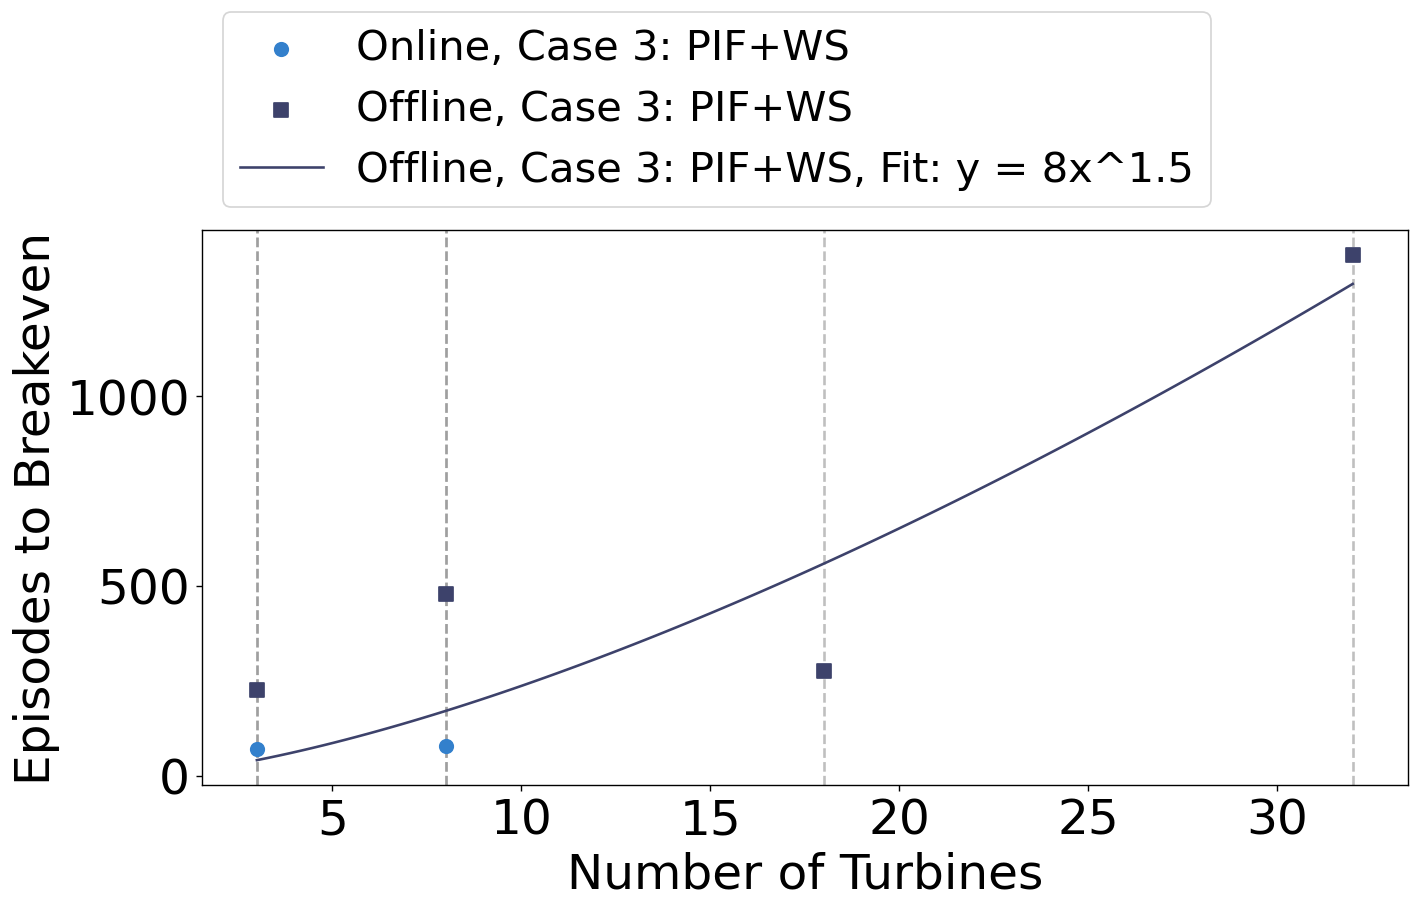

In [10]:
# plot scaling vs episodes
fig=plt.figure(figsize=(10,6),dpi=125)
offline_store = []
online_store = []
case_previous = []
for case in caselist:

    with open(case['rundir']+case['datafile'], 'rb') as file:
        (breakeven_i,breakeven_time) = pickle.load(file)
    x = case['numturbines']
    y = breakeven_i
    print(y)
    if case_previous!=case['label']:
        plt.scatter(x,y,color=case['color'],marker=case['marker'],s=60, label=case['label'])
        case_previous = case['label']
    else:
        plt.scatter(x,y,color=case['color'],marker=case['marker'],s=60)

    plt.axvline(x, color='gray', alpha = 0.5, linestyle='--', zorder = 0)

    # store data for regression
    if 'Offline' in case['label']:
        offline_store.append((x,y))
        offline_color = case['color']
        offline_label = case['label']
    elif 'Online' in case['label']:
        online_store.append((x,y))
        online_color = case['color']
        online_label = case['label']

# calculate and plot regression lines
x_fit,y_fit,a,b = fit_function(x,y,offline_store)
plt.plot(x_fit, y_fit, color=offline_color, label=offline_label+f', Fit: y = {a:.0f}x^{b:.1f}')
# x_fit,y_fit,a,b = fit_function(x,y,online_store)
# plt.plot(x_fit, y_fit, color=online_color, label=online_label+f', Fit: y = {a:.2f}x^{b:.2f}')

# plt.xscale('log')
# plt.axhline(100, color='black', linestyle='-')
plt.xlabel('Number of Turbines')
plt.ylabel('Episodes to Breakeven')
# plt.xlim([window, 3000])
# plt.ylim([60, 110])
# plt.legend(fontsize=fontsize-4,bbox_to_anchor=(1, 1.03))
plt.legend(fontsize=fontsize-4,bbox_to_anchor=(0.0, 1.43),loc='upper left')
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
fig.savefig(os.path.join('combination_combined_scaling1.svg'), format='svg', dpi=100)

516.0
40.95238095238095
0.4240277777777777
588.0
46.666666666666664
0.5308333333333334
516.0
40.95238095238095
1.3556944444444445
588.0
46.666666666666664
3.2530555555555556
732.0
58.095238095238095
2.3468055555555556
876.0
69.52380952380952
13.910555555555556


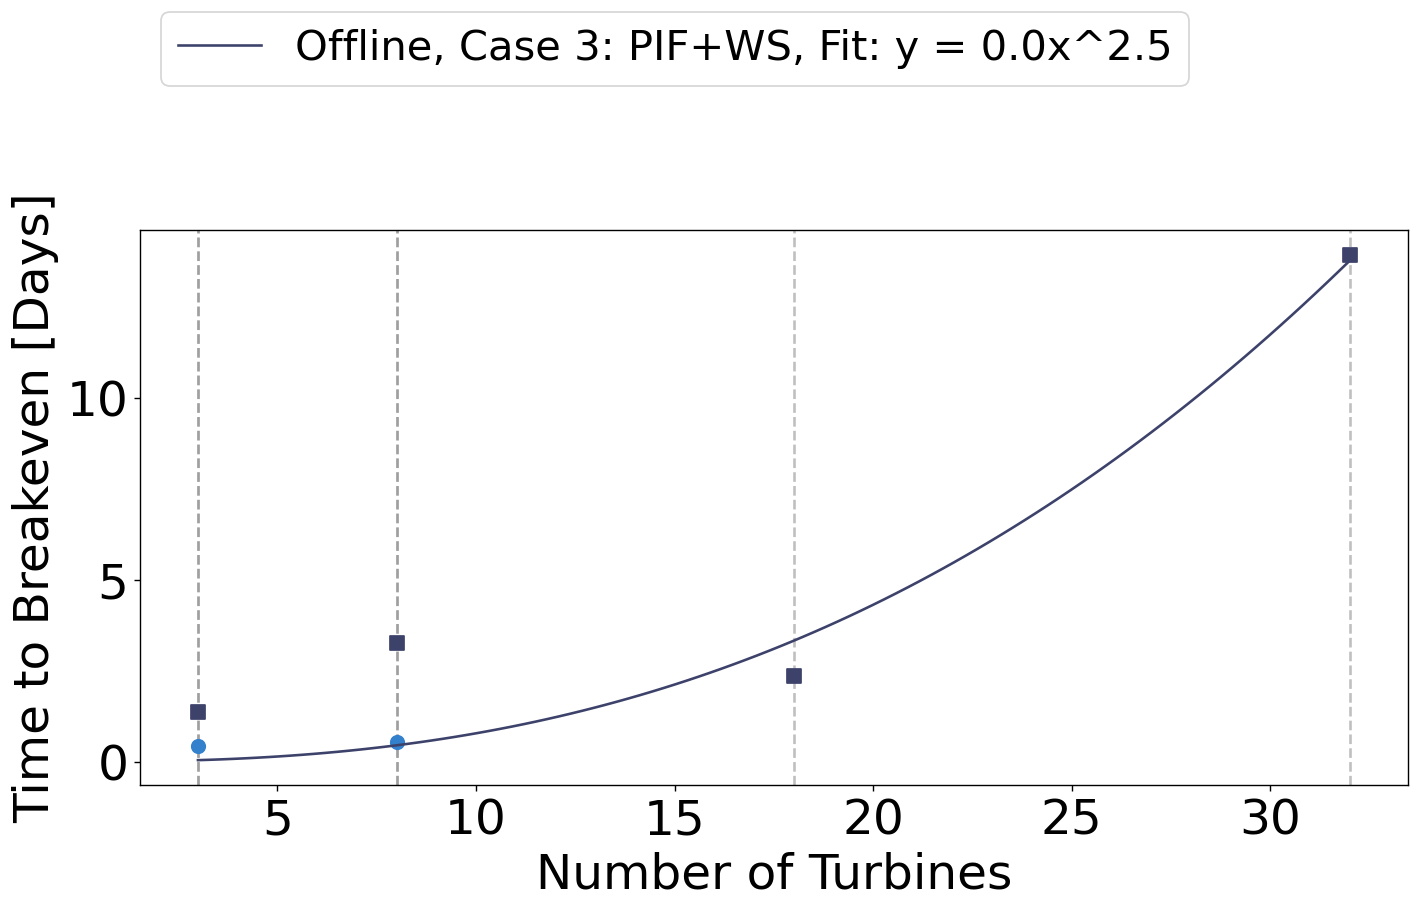

In [11]:
# plot scaling vs time
fig,ax1=plt.subplots(figsize=(10,6),dpi=125)
offline_store = []
online_store = []
case_previous = []
for case in caselist:

    with open(case['rundir']+case['datafile'], 'rb') as file:
        (breakeven_i,breakeven_time) = pickle.load(file)
    x = case['numturbines']

    # calculate flow time per episode
    if x == 3:
        rows = 3
    elif x == 8:
        rows = 4
    elif x == 18:
        rows = 6
    elif x == 32:
        rows = 8
    velocity = 10 # m/s
    convection_velocity_factor = 0.7
    diameter = 126 # m
    row_separation = 4 # diameters
    flow_time_per_episode = 300 + rows*row_separation*diameter/(velocity*convection_velocity_factor)
    print(flow_time_per_episode)
    flow_time_per_episode_nondimen = flow_time_per_episode*velocity/diameter
    print(flow_time_per_episode_nondimen)
    #

    y = breakeven_i*flow_time_per_episode/3600/24
    print(y)
    if case_previous!=case['label']:
        ax1.scatter(x,y,color=case['color'],marker=case['marker'],s=60)#, label=case['label'])
        case_previous = case['label']
    else:
        ax1.scatter(x,y,color=case['color'],marker=case['marker'],s=60)

    ax1.axvline(x, color='gray', alpha = 0.5, linestyle='--', zorder = 0)

    # store data for regression
    if 'Offline' in case['label']:
        offline_store.append((x,y))
        offline_color = case['color']
        offline_label = case['label']
    elif 'Online' in case['label']:
        online_store.append((x,y))
        online_color = case['color']
        online_label = case['label']

# calculate and plot regression lines
x_fit,y_fit,a,b = fit_function(x,y,offline_store)
ax1.plot(x_fit, y_fit, color=offline_color, label=offline_label+f', Fit: y = {a:.1f}x^{b:.1f}')
# x_fit,y_fit,a,b = fit_function(x,y,online_store)
# plt.plot(x_fit, y_fit, color=online_color, label=online_label+f', Fit: y = {a:.2f}x^{b:.2f}')

# plt.xscale('log')
# plt.axhline(100, color='black', linestyle='-')
ax1.set_xlabel('Number of Turbines')
ax1.set_ylabel('Time to Breakeven [Days]')
# plt.xlim([window, 3000])
# plt.ylim([60, 110])
# plt.legend(fontsize=fontsize-4,bbox_to_anchor=(1, 1.03))
ax1.legend(fontsize=fontsize-4,bbox_to_anchor=(0.0, 1.43),loc='upper left')
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
fig.savefig(os.path.join('combination_combined_scaling2.svg'), format='svg', dpi=100)